In [1]:
import pandas as pd
import os, shutil
import tensorflow as tf
import IPython.display as display
import numpy as np
import time
import functools
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score, roc_curve, auc
from sklearn.metrics import plot_confusion_matrix
import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
from keras.optimizers import RMSprop
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time

# Load in Images

The data directories are comprised of the file path strings, one for each train, test, and split. Within the file paths are two folders. One folder has normal chest xray photos (no pneumonia) and another folder has chest xrays of people with pneumonia.

In [2]:
datadir_train = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/train'
datadir_test = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/test'
datadir_validate = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/val'
categories = ['NORMAL', 'PNEUMONIA']

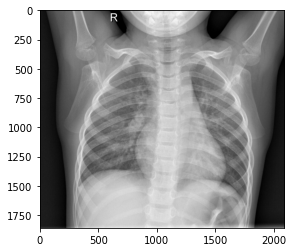

<Figure size 432x288 with 0 Axes>

In [3]:
#within the train dataset, iterate through all images in the two folders
for category in categories: 
    path = os.path.join(datadir_train, category) #joins the images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #cv2.imread() loads an image
        plt.imshow(img_array)
        plt.show()
        break
    break

plt.savefig('chestxray.jpg')

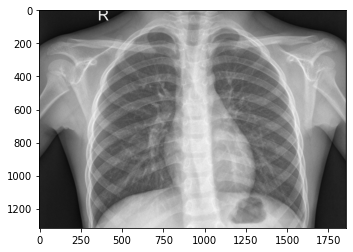

In [6]:
#within the test dataset, iterate through all images in the two folders
for category in categories: 
    path = os.path.join(datadir_test, category) #joins the images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #cv2.imread() loads an image
        plt.imshow(img_array)
        plt.show()
        break
    break

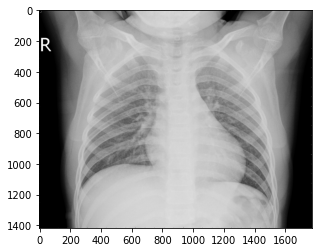

In [7]:
#within the validate dataset, iterate through all images in the two folders
for category in categories: 
    path = os.path.join(datadir_validate, category) #joins the images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #cv2.imread() loads an image
        plt.imshow(img_array)
        plt.show()
        break
    break

# Data Augmentation

In [4]:
data_train = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_train, 
        target_size=(256, 256), 
        batch_size = 5216, 
        seed = 123,
        class_mode="binary") 

Found 5216 images belonging to 2 classes.


In [5]:
data_test = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_test, 
        target_size=(256, 256), 
        batch_size = 624, 
        seed = 123,
        class_mode="binary")
#         shuffle = False) 

Found 624 images belonging to 2 classes.


In [6]:
data_val = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_validate, 
        target_size=(256, 256), 
        batch_size = 16, 
        seed = 12,
        class_mode="binary")
#         shuffle = False) 

Found 16 images belonging to 2 classes.


In [7]:
train_images, train_labels = next(data_train)
test_images, test_labels = next(data_test)
val_images, val_labels = next(data_val)

In [8]:
normal = datadir_train + '/NORMAL'
pneumonia = datadir_train + '/PNEUMONIA'
# print(os.listdir(normal))

In [13]:
noram_imgs_lst = os.listdir(normal)
pneumonia_imgs_lst = os.listdir(pneumonia)

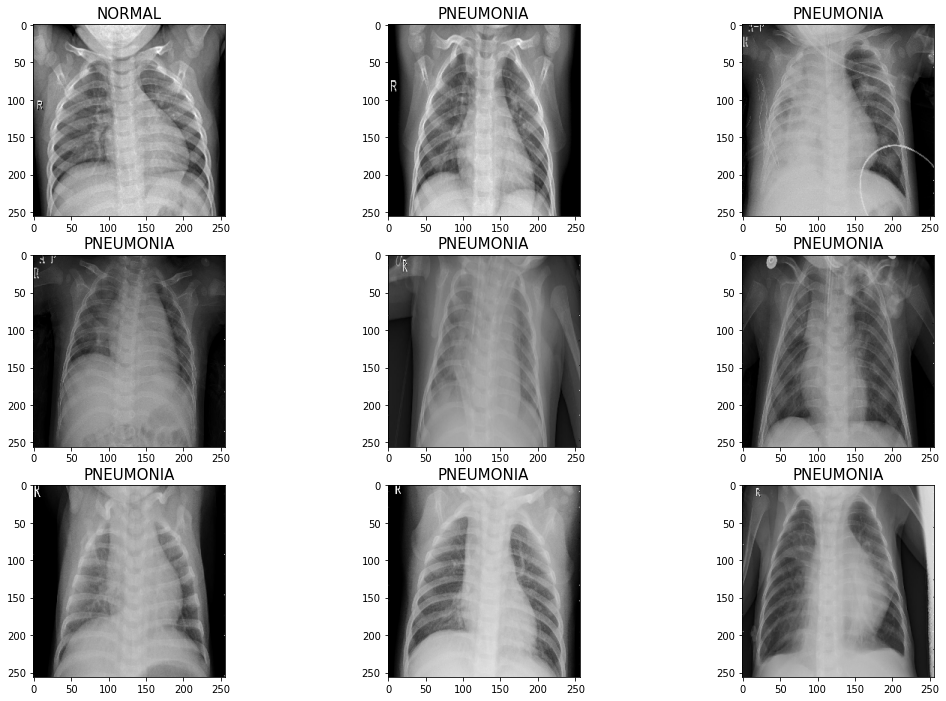

In [14]:
#visualize images
%matplotlib inline
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (18,12))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i])
    plt.title(categories[int(train_labels[i])], fontsize = 15)
plt.show()

# Modeling

In [9]:
X_train = np.array(train_images)
y_train = np.array(train_labels)

X_test = np.array(test_images)
y_test = np.array(test_labels)

X_val = np.array(val_images)
y_val = np.array(val_labels)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(5216, 256, 256, 3)
(5216,)
(624, 256, 256, 3)
(624,)
(16, 256, 256, 3)
(16,)


In [13]:
# test = y_train.reshape((-1, 256, 256, 1))

In [14]:
# y_train = np.reshape(y_train[:,0], (5216,1))

In [15]:
#reshape labels

# labels = np.reshape(labels[:,0], (5216,1))

# Modeling

## Model One - Feedforward Neural Network (Dense layers) - generic

In [16]:
num_classes = 1

# specifying the model structure
model = Sequential()


# y_train = keras.utils.to_categorical(y_train-1, num_classes, dtype='int')
# y_test = keras.utils.to_categorical(y_test-1, num_classes, dtype='int')


print(y_train.shape)
print(X_train.shape)
# print(y_test)
# y_train = np.array(y_train)

# specify the first hidden layer
# X_train_reshape = np.array(X_train).reshape(-1, 1, 1)
# print(X_train_reshape)
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# specify the second layer
model.add(Dense(64))
model.add(Dropout(0.2))

# specify the output layer
model.add(Dense(num_classes, activation='sigmoid'))

# model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(X_train.flatten()[:len(y_train)], y_train,
                    batch_size= 1,
                    epochs=4,
                    verbose=1,
                    validation_data=(X_val.flatten()[:len(y_val)], y_val.flatten()))
score = model.evaluate(X_test.flatten()[:len(y_test)], y_test.flatten(), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

(128,)
(128, 256, 256, 3)
Epoch 1/4
128/128 [==============================] - 2s 10ms/step - loss: 0.6121 - accuracy: 0.7742 - val_loss: 0.9115 - val_accuracy: 0.5000
Epoch 2/4
128/128 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.8541 - val_loss: 1.0248 - val_accuracy: 0.5000
Epoch 3/4
128/128 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.8421 - val_loss: 0.9880 - val_accuracy: 0.5000
Epoch 4/4
128/128 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.7670 - val_loss: 1.1185 - val_accuracy: 0.5000
Test loss: 1.6776667833328247
Test accuracy: 0.0


## Model Two - CNN

In [ ]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256,  3), padding = 'same')) #3 x 3 shape of filter, 64 convolutions
cnn.add(layers.MaxPooling2D((2, 2),padding='same')) #padding added so edge pixels get included in convolution
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same')) #hidden layer
cnn.add(layers.MaxPooling2D((2, 2),padding='same')) #max pooling
cnn.add(layers.Flatten()) #flatten layer
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid')) #sigmoid bc classification problem

cnn.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.007),
              metrics=['acc']) #compiling with gradient descent

history = cnn.fit(data_train,
                epochs=1,
                batch_size=50,
                validation_data = data_val)

In [ ]:
# history = cnn.fit(data_train,
#                     epochs=5,
#                     batch_size=50,
#                     validation_data = data_val)

In [ ]:
cnn.summary()

In [ ]:
results_train = cnn.evaluate(data_train)
results_test = cnn.evaluate(data_test)
print(results_train, results_test)

In [ ]:
#confusion matrix
pred = cnn.predict(X_test)
confusion_matrix(y_test, pred.round())

In [ ]:
plot_confusion_matrix(y_test, pred.round())

In [ ]:
loss_values = history['loss']
val_loss_values = history['val_loss']
acc_values = history['acc'] 
val_acc_values = history['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model 3 - Also CNN

In [57]:
tic = time.time()
cnn3 = models.Sequential()
cnn3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256,  3), padding = 'same')) #3 x 3 shape of filter, 64 convolutions
cnn3.add(layers.AveragePooling2D((2, 2),padding='same'))
cnn3.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn3.add(layers.AveragePooling2D((2, 2),padding='same'))
cnn3.add(layers.Flatten())
cnn3.add(layers.Dense(32, activation='relu'))
cnn3.add(layers.Dense(1, activation='sigmoid')) #sigmoid bc classification problem

cnn3.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.002),
              metrics=['acc', 'Recall', 'Precision'])

In [58]:
history = cnn3.fit(data_train,
                epochs=9,
                batch_size=25,
                validation_data=(data_val))
toc = time.time()
print('run time:', toc-tic)

Epoch 1/9
41/41 [==============================] - 469s 11s/step - loss: 1.0325 - acc: 0.6441 - recall: 0.7863 - precision: 0.7228 - val_loss: 0.7261 - val_acc: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000
Epoch 2/9
41/41 [==============================] - 830s 20s/step - loss: 0.3079 - acc: 0.7884 - recall: 0.9928 - precision: 0.7831 - val_loss: 0.8372 - val_acc: 0.5625 - val_recall: 1.0000 - val_precision: 0.5333
Epoch 3/9
41/41 [==============================] - 740s 18s/step - loss: 0.2450 - acc: 0.9290 - recall: 0.9789 - precision: 0.9314 - val_loss: 0.3850 - val_acc: 0.9375 - val_recall: 1.0000 - val_precision: 0.8889
Epoch 4/9
41/41 [==============================] - 701s 17s/step - loss: 0.2284 - acc: 0.9430 - recall: 0.9801 - precision: 0.9454 - val_loss: 0.3575 - val_acc: 0.9375 - val_recall: 1.0000 - val_precision: 0.8889
Epoch 5/9
41/41 [==============================] - 723s 17s/step - loss: 0.2193 - acc: 0.9576 - recall: 0.9808 - precision: 0.9620 - val_loss: 0.372

## Model 4 - CNN

In [60]:
tic = time.time()
cnn4 = models.Sequential()
cnn4.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256,  3), padding = 'same')) #3 x 3 shape of filter, 64 convolutions
cnn4.add(layers.MaxPooling2D((2, 2),padding='same'))
cnn4.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn4.add(layers.AveragePooling2D((2, 2),padding='same'))
cnn4.add(layers.Flatten())
cnn4.add(layers.Dense(32, activation='relu'))
cnn4.add(layers.Dropout(.5))
cnn4.add(layers.Dense(1, activation='sigmoid')) #sigmoid bc classification problem

cnn4.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.002),
              metrics=['acc', 'Recall', 'Precision', 'AUC'])

In [62]:
history = cnn4.fit(X_train,
                y_train,
                epochs=5,
                batch_size=25,
                validation_data=(X_val, y_val))
toc = time.time()
print('run time:', toc-tic)

Epoch 1/5
6/6 [==============================] - 25s 3s/step - loss: 2.2345 - acc: 0.6513 - recall: 0.7314 - precision: 0.8200 - auc: 0.5093 - val_loss: 0.6931 - val_acc: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000 - val_auc: 0.5000
Epoch 2/5
6/6 [==============================] - 17s 3s/step - loss: 0.6590 - acc: 0.7298 - recall: 0.8194 - precision: 0.8378 - auc: 0.5873 - val_loss: 0.7341 - val_acc: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000 - val_auc: 0.6562
Epoch 3/5
6/6 [==============================] - 15s 2s/step - loss: 1.1082 - acc: 0.8204 - recall: 1.0000 - precision: 0.8204 - auc: 0.4661 - val_loss: 0.8394 - val_acc: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000 - val_auc: 0.5000
Epoch 4/5
6/6 [==============================] - 15s 2s/step - loss: 0.6468 - acc: 0.7797 - recall: 1.0000 - precision: 0.7797 - auc: 0.5466 - val_loss: 0.6848 - val_acc: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000 - val_auc: 0.9062
Epoch 5/5
6/6 [=====================

In [63]:
cnn4.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 126, 126, 32)      18464     
_________________________________________________________________
average_pooling2d_17 (Averag (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 127008)            0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                4064288   
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)              

## Model 5

In [64]:
from keras.applications import inception_v3
from keras.layers import Dense,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Model

In [65]:
imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False)
imagenet_new=imagenet.output
inception_model = models.Sequential()
inception_model.add(imagenet)
inception_model.add(GlobalAveragePooling2D())
inception_model.add(Dense(1024,activation='relu'))
inception_model.add(Dense(1024,activation='relu')) #dense layer 2
inception_model.add(Dense(512,activation='relu')) #dense layer 3
inception_model.add(Dense(1,activation='sigmoid')) #final layer with sigmoid activation

In [69]:
inception_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy', 'Recall', 'Precision', 'AUC'])

# step_size_train=train_generator.n//train_generator.batch_size
inception_model.fit(X_train,
          y_train,
          epochs=6,
          batch_size=32,
          validation_data=(X_val, y_val))

Epoch 1/6
4/4 [==============================] - 181s 36s/step - loss: 0.5781 - accuracy: 0.7906 - recall: 1.0000 - precision: 0.7906 - auc: 0.6308 - val_loss: 8.5411 - val_accuracy: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000 - val_auc: 0.5000
Epoch 2/6
4/4 [==============================] - 131s 33s/step - loss: 0.1595 - accuracy: 0.8385 - recall: 1.0000 - precision: 0.8365 - auc: 0.9973 - val_loss: 52.5134 - val_accuracy: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000 - val_auc: 0.5000
Epoch 3/6
4/4 [==============================] - 112s 28s/step - loss: 0.0943 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - auc: 1.0000 - val_loss: 80.7626 - val_accuracy: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000 - val_auc: 0.5000
Epoch 4/6
4/4 [==============================] - 113s 28s/step - loss: 0.0160 - accuracy: 0.9948 - recall: 0.9936 - precision: 1.0000 - auc: 1.0000 - val_loss: 121.5181 - val_accuracy: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000 - 

In [70]:
inception_model.evaluate(X_test, y_test)

4/4 [==============================] - 30s 5s/step - loss: 788.7981 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00 - auc: 0.0000e+00


[788.798095703125, 0.0, 0.0, 0.0, 0.0]

In [ ]:
predictions_transfer = inception_model.predict(X_test)
predictions_transfer = np.around(predictions_transfer)

## Additional Data Augmentation

In [16]:
data_train = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2, 
                                shear_range=0.3, 
                                zoom_range=0.1, 
                                horizontal_flip=False).flow_from_directory(datadir_train, target_size=(256, 256), 
                                                                           batch_size = 5216, seed = 27, class_mode="binary") 

Found 5216 images belonging to 2 classes.


In [ ]:
data_test = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2, 
                                shear_range=0.3, 
                                zoom_range=0.1, 
                                horizontal_flip=False).flow_from_directory(datadir_test, target_size=(256, 256), 
                                                                           batch_size = 5216, seed = 27, class_mode="binary") 

In [ ]:
data_val = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2, 
                                shear_range=0.3, 
                                zoom_range=0.1, 
                                horizontal_flip=False).flow_from_directory(datadir_validate, target_size=(256, 256), 
                                                                           batch_size = 5216, seed = 27, class_mode="binary") 

# Model 6 - Resnet

In [ ]:
tf.keras.applications.ResNet50(
    include_top = False,
    weights = "imagenet",
    input_tensor =None,
    input_shape = (256, 256, 3),
    pooling=None)